# **_DESARROLLO DEL LABORATORIO N°15_**

In [47]:
#Importando librerías necesarias
import os
import pandas as pd
import numpy as np
import seaborn as sns    #Librería Gráfica
import matplotlib.pyplot as plt #Librería Gráfica

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss         #Para llevar a cabo UnderSampling

from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE  
import statsmodels.api as sm  #Para Análisis de Regresión Logística con librería stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

In [8]:
miArchivo='creditcard.csv'
df=pd.read_csv(miArchivo, sep=',')
del df['Time']

In [9]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **1. Asignar el 60% y 40% a la data de entrenamiento y testeo respectivamente.**

In [ ]:
#Dividimos la data (entrenamiento y testeo)

In [16]:
X=df.iloc[:,:29]
y=df.iloc[:,29]

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.4,
                                               random_state=2021,
                                               stratify=y)

### 2. Crear un dataframe a partir de la data de entrenamiento con la tecnica de balanceo de datos "UnderSampling" y parámetro de balanceo 0.7.

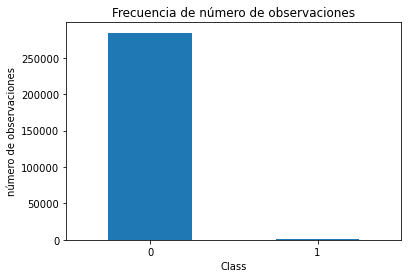

In [31]:
#Visualizamos el desbalanceo
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
#plt.xticks(range(2))
plt.title("Frecuencia de número de observaciones")
plt.xlabel("Class")
plt.ylabel("número de observaciones")
plt.show()

In [18]:
#Primero creamos una instancia de NearMiss
under=NearMiss(sampling_strategy=0.7, 
               n_neighbors=11)

In [19]:
#fit_resample me arroja 2 objetos ya balanceados
xtrain_under,ytrain_under= under.fit_resample(X_train,y_train)

In [22]:
#X_train.columns
columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [23]:
#Datos de Entrenamiento DF
xtrain_under=pd.DataFrame(xtrain_under,columns=columns)
ytrain_under=pd.DataFrame(ytrain_under,columns=["Class"])

df_entrenamiento_under=pd.concat([xtrain_under,ytrain_under],axis=1)
df_entrenamiento_under.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.161523,1.173309,-1.602805,1.485067,1.046127,-1.044961,0.568273,-0.078050,-0.649025,-1.413683,...,-0.135894,-0.311787,-0.186780,-0.318052,0.741276,-0.280487,0.049991,0.082487,1.00,0
1,1.161685,1.168669,-1.604114,1.485647,1.040086,-1.046640,0.563452,-0.074108,-0.638580,-1.411608,...,-0.136753,-0.317371,-0.185857,-0.319944,0.738985,-0.280244,0.049561,0.082320,0.89,0
2,1.146649,1.141946,-1.527127,1.538383,0.900342,-1.174930,0.538144,-0.062330,-0.586083,-1.399037,...,-0.128206,-0.315543,-0.155217,-0.125748,0.696576,-0.291551,0.046934,0.083482,1.00,0
3,1.161938,1.193626,-1.596951,1.482299,1.070830,-1.038444,0.586824,-0.093678,-0.690740,-1.421726,...,-0.132792,-0.289159,-0.189991,-0.310513,0.750641,-0.281399,0.051813,0.083060,0.89,0
4,1.146760,1.132315,-1.529868,1.539633,0.888153,-1.178248,0.528649,-0.054473,-0.565206,-1.394939,...,-0.129857,-0.326769,-0.153466,-0.129527,0.691954,-0.291078,0.046054,0.083167,0.89,0


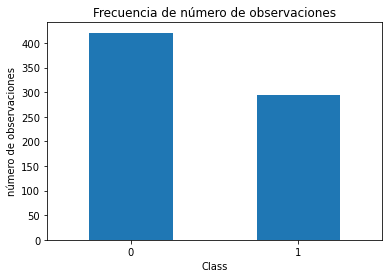

In [30]:
#Visualizamos el balanceo
count_classes = pd.value_counts(df_entrenamiento_under['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
#plt.xticks(range(2))
plt.title("Frecuencia de número de observaciones")
plt.xlabel("Class")
plt.ylabel("número de observaciones")
plt.show()

### 3. Utilizar esa data balanceada para aplicar un modelo de regresión logística utilizando sólo 6 variables predictoras (utilice recursive feature elimination (RFE)) y tener en cuenta que el TARGET es Class

In [33]:
#Instanciamos un objeto de clase LogisticRegression()
logit=LogisticRegression()

**Aplicando RFE(Recursive Feature Elimination)**

In [34]:
#Numero de variables a quedarse
n=6

In [35]:
#Instanciando un objeto RFE
RFE=RFE(estimator=logit,n_features_to_select=n)

In [38]:
#Identificando las variales dentro del modelo
df_vars=df_entrenamiento_under.columns.to_list()

In [39]:
#Detectando las predictoras y target
#target
Y=['Class']
#predictoras
X=[v for v in df_vars if v not in Y]

In [40]:
#Aprendiendo de los datos de entrenamiento
selector=RFE.fit(df_entrenamiento_under[X],df_entrenamiento_under[Y])

In [41]:
#Mostrar las variables más significativas
print(selector.support_)

[ True False False False False  True False False False False False  True
 False  True  True False False  True False False False False False False
 False False False False False]


In [44]:
final=zip(df_vars,selector.support_,selector.ranking_)
list(final)

[('V1', True, 1),
 ('V2', False, 10),
 ('V3', False, 3),
 ('V4', False, 7),
 ('V5', False, 6),
 ('V6', True, 1),
 ('V7', False, 5),
 ('V8', False, 23),
 ('V9', False, 15),
 ('V10', False, 20),
 ('V11', False, 9),
 ('V12', True, 1),
 ('V13', False, 18),
 ('V14', True, 1),
 ('V15', True, 1),
 ('V16', False, 17),
 ('V17', False, 4),
 ('V18', True, 1),
 ('V19', False, 12),
 ('V20', False, 22),
 ('V21', False, 16),
 ('V22', False, 13),
 ('V23', False, 19),
 ('V24', False, 21),
 ('V25', False, 11),
 ('V26', False, 2),
 ('V27', False, 14),
 ('V28', False, 24),
 ('Amount', False, 8)]

**Estimación REGRESIÓN LOGÍSTICA con statsmodel**

In [45]:
x=df_entrenamiento_under[['V1','V6','V12','V14','V15','V18']]
y=df_entrenamiento_under['Class']

In [48]:
#Aprendiendo
logit= sm.Logit(y,x)
resultado=logit.fit()

Optimization terminated successfully.
         Current function value: 0.070163
         Iterations 12


In [49]:
#Resumiendo
resultado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.896      
Dependent Variable: Class            AIC:              112.4734   
Date:               2021-05-10 22:40 BIC:              139.9155   
No. Observations:   716              Log-Likelihood:   -50.237    
Df Model:           5                LL-Null:          -485.15    
Df Residuals:       710              LLR p-value:      9.0266e-186
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     12.0000                                       
---------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
---------------------------------------------------------------------
V1     -2.0041      0.3647    -5.4958    0.0000    -2.7188    -1.2894
V6      1.8428      0.3999     4.6076    0.0000     1.0589     2.6267
V12    -1.5649      0.4899    -3.1942    0.0014    -2.5251    -0.6047
V14    -1.2194      0.2861    -4.2618    0.0000    -1.7801    -0.6586
V15    -2.3595      0.4327    -5.4533    0.0000    -3.2075    -1.5115
V18    -1.1092      0.4923    -2.2531    0.0243    -2.0741    -0.1443
==================================================================

"""